# <center> HEART FAILURE PREDICTION

![image](https://bsmedia.business-standard.com/_media/bs/img/article/2020-10/02/full/1601658256-1914.jpg?im=FeatureCrop,size=(826,465))

### Context:

Heart failure is a chronic condition characterized by the heart's inability to pump blood efficiently to meet the body's needs. It can result from various underlying causes such as coronary artery disease, hypertension, or previous heart attacks, leading to symptoms like shortness of breath, fatigue, and fluid retention. Heart failure poses a significant health challenge globally, with high mortality rates and reduced quality of life for affected individuals. Predicting heart failure is essential due to its progressive nature and potential for acute exacerbations, which can lead to hospitalizations and complications. Predictive models for heart failure leverage patient data, including medical history, diagnostic tests, and biomarkers, to assess individual risk profiles. Early identification of high-risk patients allows for proactive management strategies such as medication optimization, lifestyle modifications, and timely interventions to prevent disease progression and reduce adverse outcomes. By focusing on prevention and early intervention, predictive models for heart failure play a crucial role in improving patient outcomes and reducing the economic burden on healthcare systems.





### Content:

This dataset gives different details of the people suspected of heart failure. Here we are going to closely analyze each parameter and find out whether they are an indicator of heart attack or not. So that we can predict heart failures in the future.

#### Defining each variables

Age: age of the patient (years)

Sex: sex of the patient (M: Male, F: Female)

ChestPainType: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

RestingBP: resting blood pressure (mm Hg)

Cholesterol: serum cholesterol (mm/dl)

FastingBS: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

RestingECG: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)


MaxHR: maximum heart rate achieved (Numeric value between 60 and 202)

ExerciseAngina: exercise-induced angina (Y: Yes, N: No)

Oldpeak: oldpeak = ST (Numeric value measured in depression)

ST_Slope: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

HeartDisease: output class (1: heart disease, 0: Normal)

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st


from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [4]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [5]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


From the dataset we can infer that:
    Age in consideration is in the range of 28 and 77.
    The cholesterol level goes up to the value of 603.
    maximum heart rate varies between 60 and 202 from person to person.

In [8]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [11]:
max_Cholesterol = df['Cholesterol'].idxmax()
row_with_max_Cholesterol = df.loc[max_Cholesterol]

print("Details of the row with maximum cholesterol:")
print(row_with_max_Cholesterol)

Details of the row with maximum cholesterol:
Age                   54
Sex                    M
ChestPainType        ASY
RestingBP            130
Cholesterol          603
FastingBS              1
RestingECG        Normal
MaxHR                125
ExerciseAngina         Y
Oldpeak              1.0
ST_Slope            Flat
HeartDisease           1
Name: 149, dtype: object


### Visualisation:

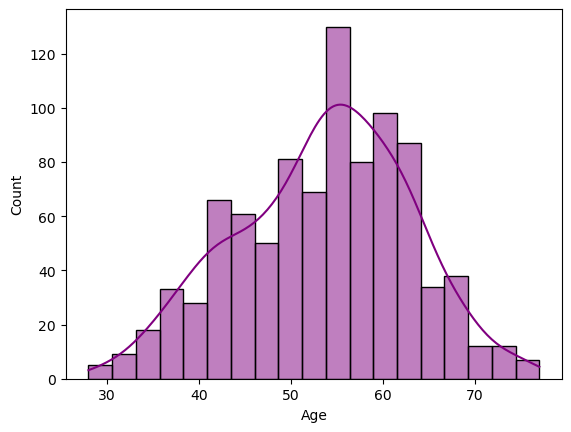

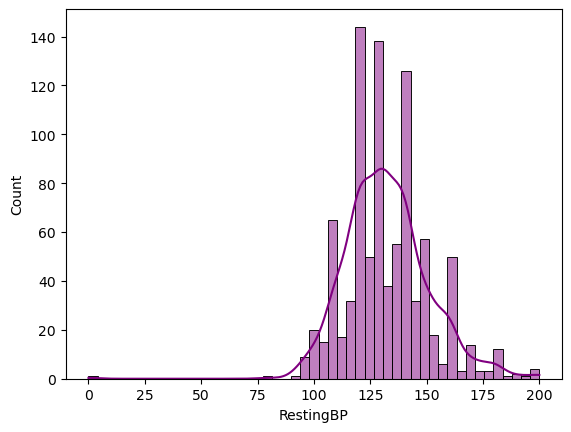

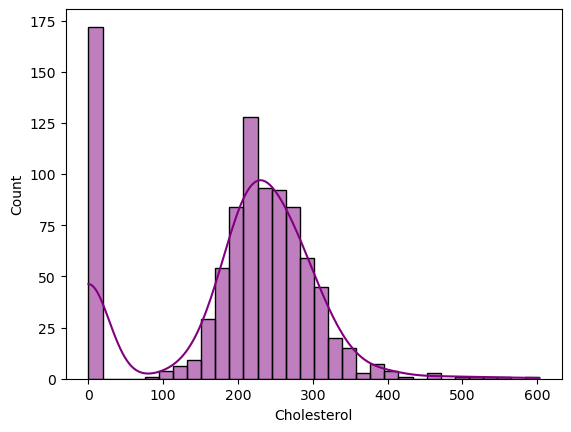

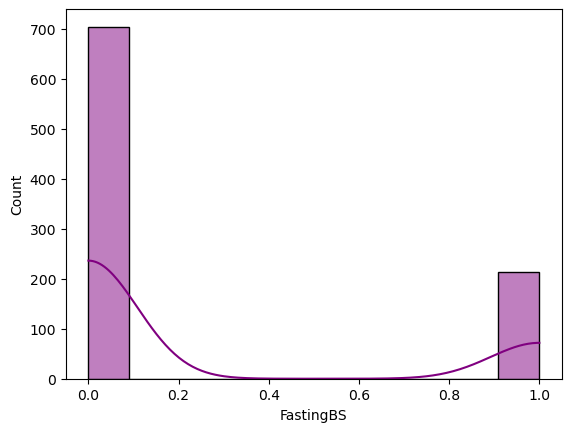

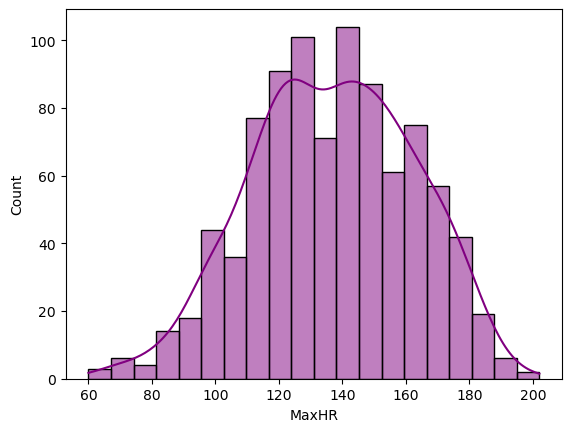

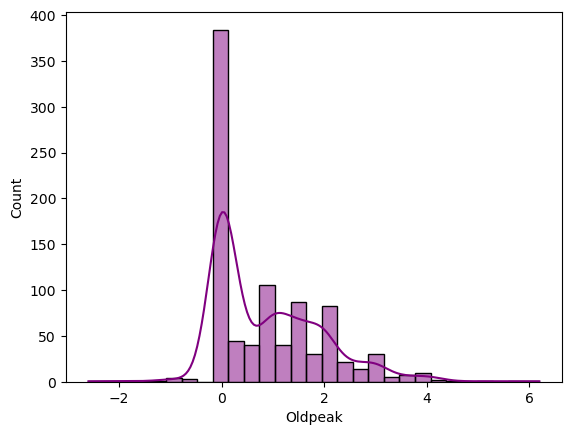

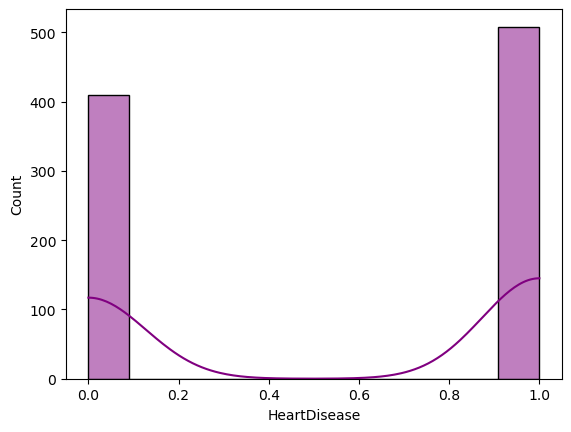

In [12]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.histplot(x=df[i],kde=True,color='purple')
        plt.show()

In [13]:
x=df.groupby(['Sex'])['HeartDisease'].sum()

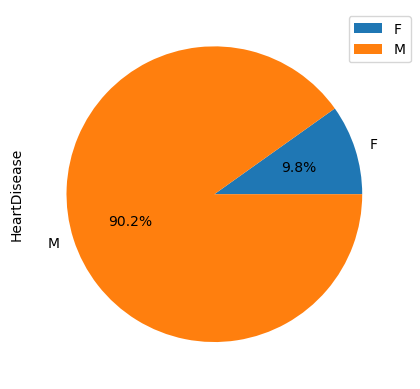

In [14]:
x.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05,1),loc='best')

Heart Disease is commomly seen in men. 90% of the patients are men.


Text(0.5, 1.0, 'Age vs Heart Disease')

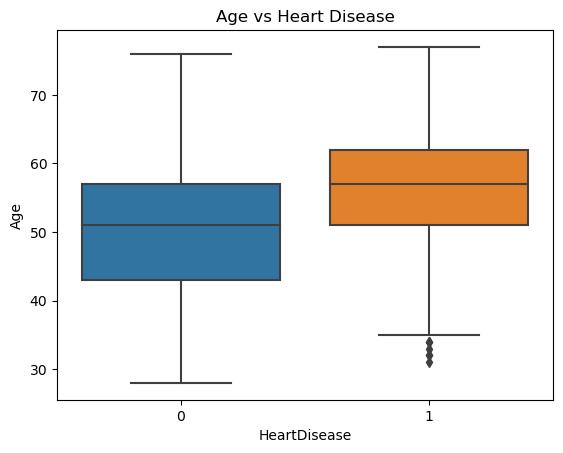

In [15]:
k=sns.boxplot(x=df.HeartDisease,y='Age',data=df)
plt.title('Age vs Heart Disease')

50-65 age group is more prone to  heart failure

Text(0.5, 1.0, 'ExerciseAngina vs HearExercise')

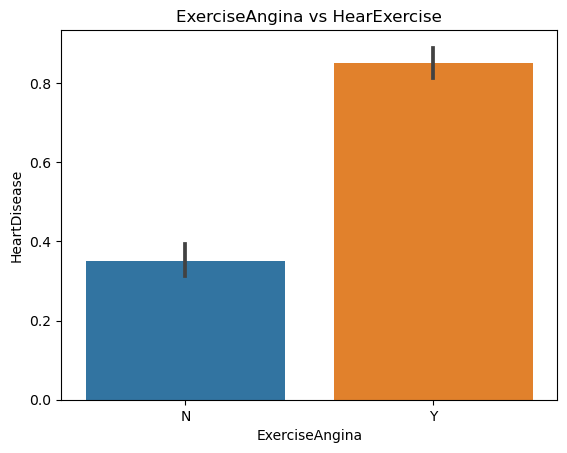

In [16]:
k=sns.barplot(y=df.HeartDisease,x='ExerciseAngina',data=df)
plt.title('ExerciseAngina vs HearExercise')

Risk of heat disease is high in patients experiencing exercise angina

Text(0.5, 1.0, 'Cholesterol vs Heart Disease')

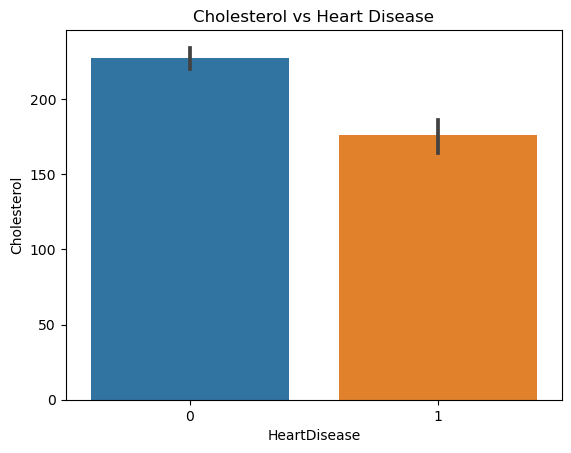

In [17]:
k=sns.barplot(x=df.HeartDisease,y='Cholesterol',data=df)
plt.title('Cholesterol vs Heart Disease')

Intersetingly heart disease is common in people having cholestrol level in range of 0 to 175. which is considered tobe normal range for cholesterol. 

Text(0.5, 1.0, 'RestingBP vs Heart Disease')

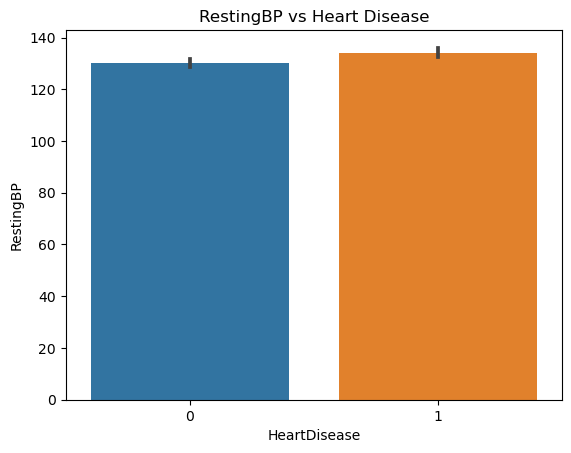

In [18]:
k=sns.barplot(x=df.HeartDisease,y='RestingBP',data=df)
plt.title('RestingBP vs Heart Disease')

There is no significant effect of resting Bp on heart disease

In [19]:
x=df.groupby(['ChestPainType'])['HeartDisease'].sum()
x

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

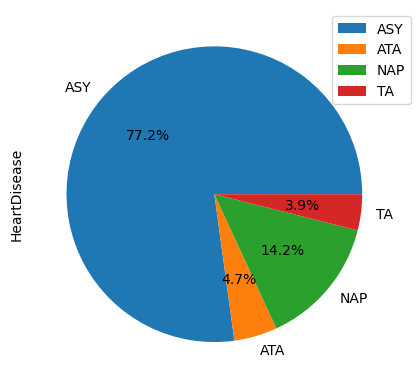

In [20]:
x.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05,1),loc='best')

Most of the people experienced symptomatic(ASY) heart failure. They didn't experience any chest pain. Only 14% of people experienced Non-Anginal Pain(NAP). It is a dangerous situation as there will be a delay in getting medical aid as there is no significant pain.

In [21]:
x=df.groupby(['RestingECG'])['HeartDisease'].sum()
x

RestingECG
LVH       106
Normal    285
ST        117
Name: HeartDisease, dtype: int64

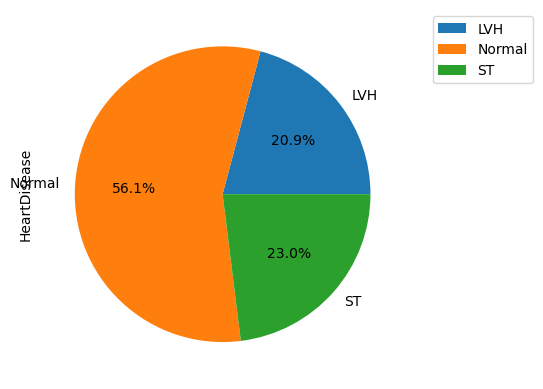

In [22]:
x.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05,1),loc='best')

RestingECG: resting electrocardiogram results ,Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria.

More than 56% of people have normal resting ECG.

In [23]:
x=df.groupby(['ST_Slope'])['HeartDisease'].sum()
x

ST_Slope
Down     49
Flat    381
Up       78
Name: HeartDisease, dtype: int64

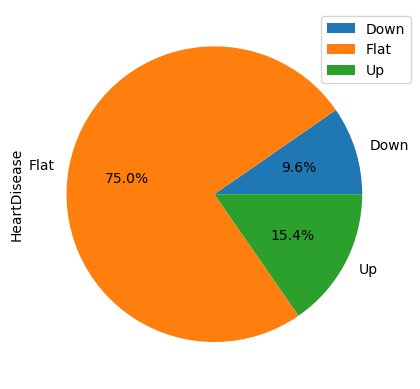

In [24]:
x.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05,1),loc='best')
plt.show()

The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease.


Here 75% of patients are having normal ST_slope.

In [25]:
x=df.groupby(['FastingBS'])['HeartDisease'].value_counts()
x

FastingBS  HeartDisease
0          0               366
           1               338
1          1               170
           0                44
Name: count, dtype: int64

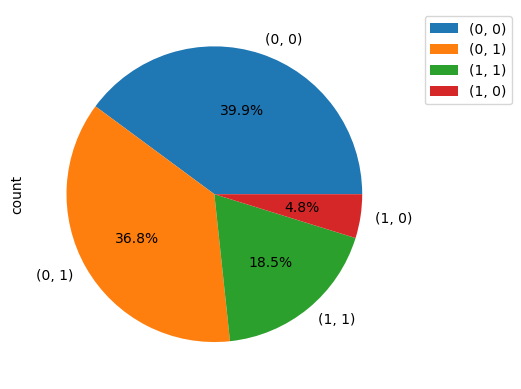

In [26]:
x.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05,1),loc='best')
plt.show()

FastingBS: fasting blood sugar 1: if FastingBS > 120 mg/dl, 0: otherwise
    
    
   Here 36.8% of people are having heart disease even without having an elevated sugar level.

<Axes: xlabel='ST_Slope', ylabel='Age'>

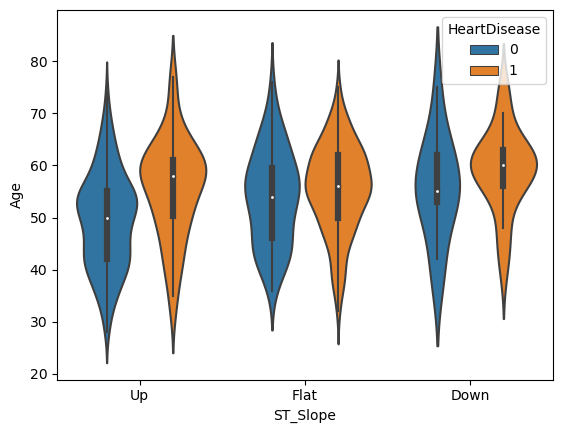

In [27]:
sns.violinplot(x=df.ST_Slope,y=df.Age,hue=df.HeartDisease)

Text(0.5, 1.0, 'Oldpeak vs Heart Disease')

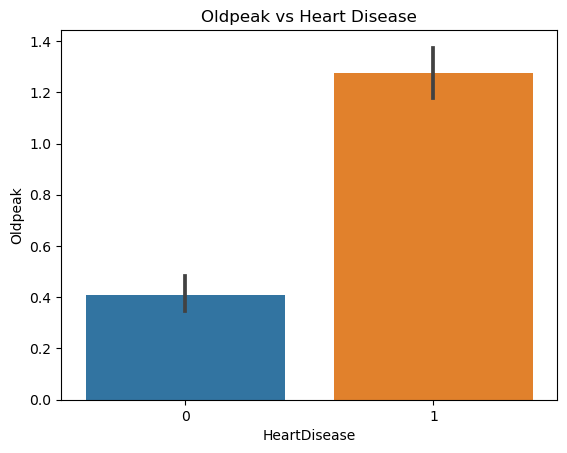

In [28]:
sns.barplot(x=df.HeartDisease,y=df.Oldpeak)
plt.title('Oldpeak vs Heart Disease')

Old peak is determinantal in heart disease.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [30]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])


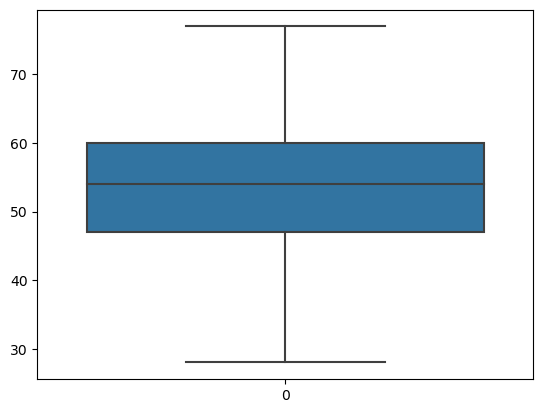

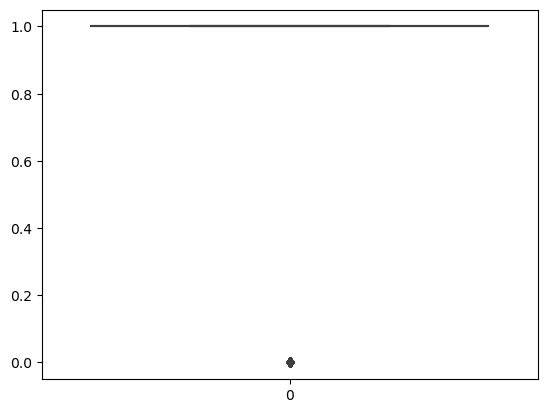

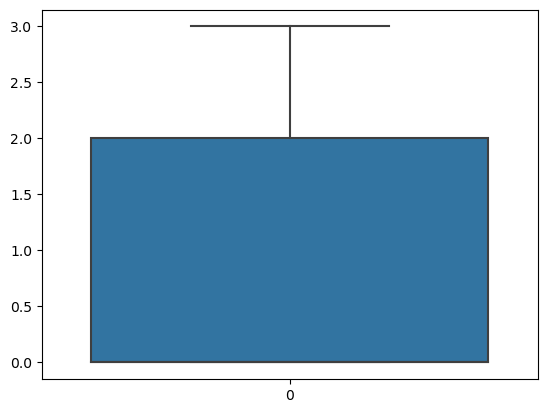

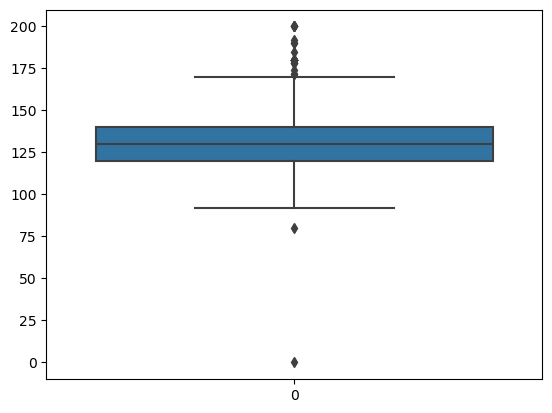

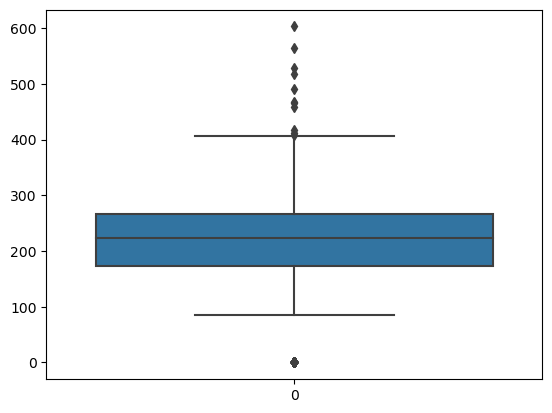

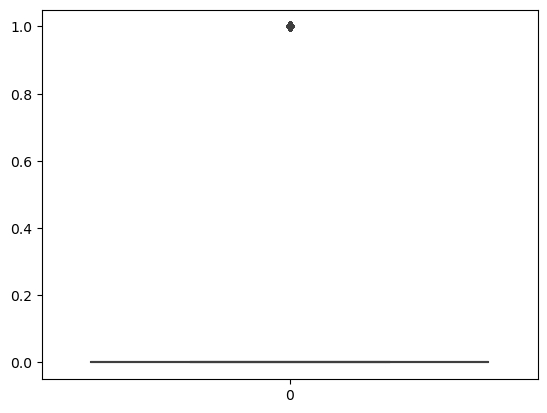

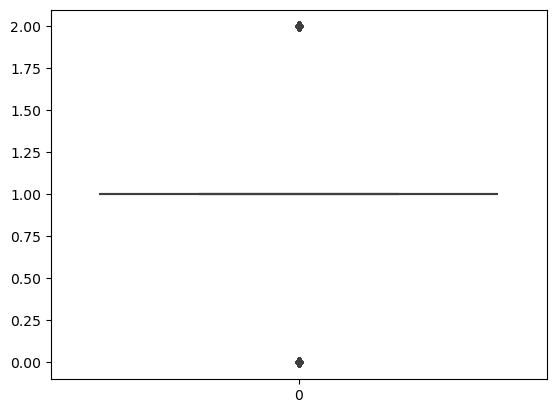

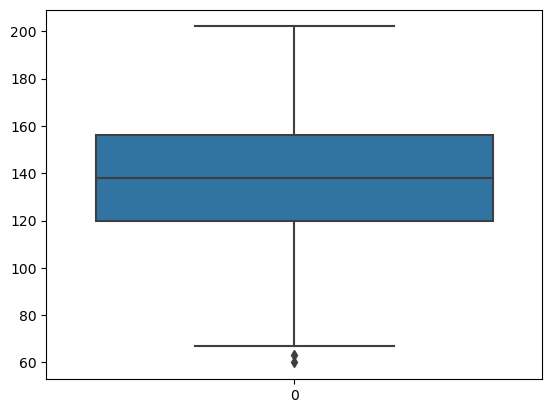

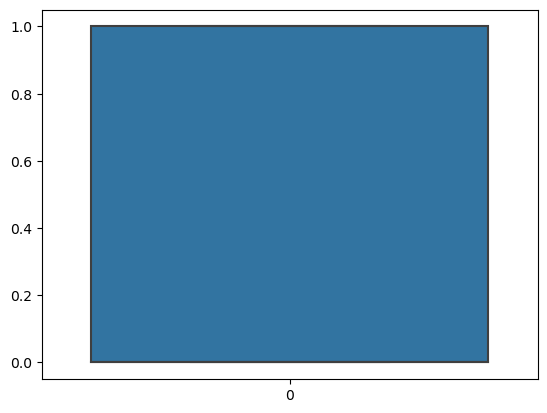

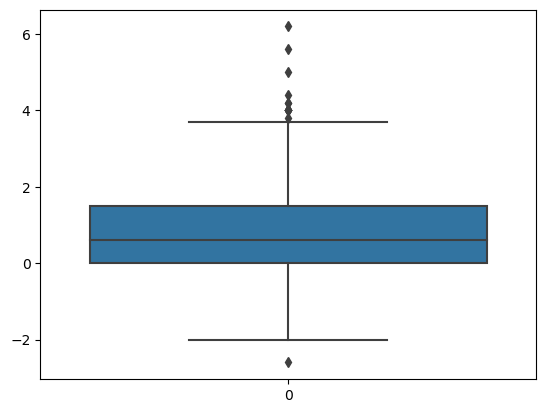

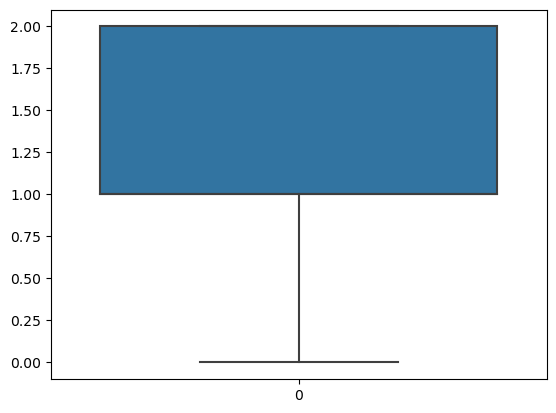

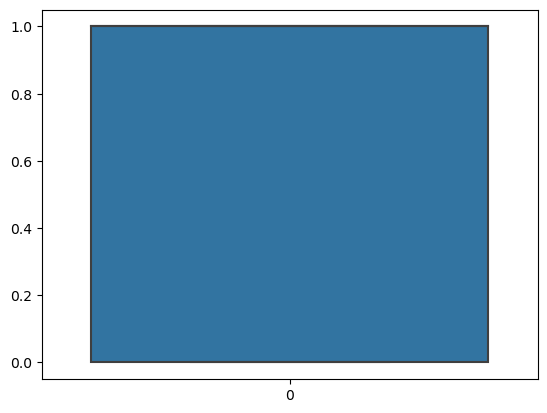

In [31]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(df[i])
        plt.show()

In [32]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL

In [33]:
for i in df.columns:
    if df[i].dtypes !='object':
        UL,LL=outlier_limit(df[i])
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

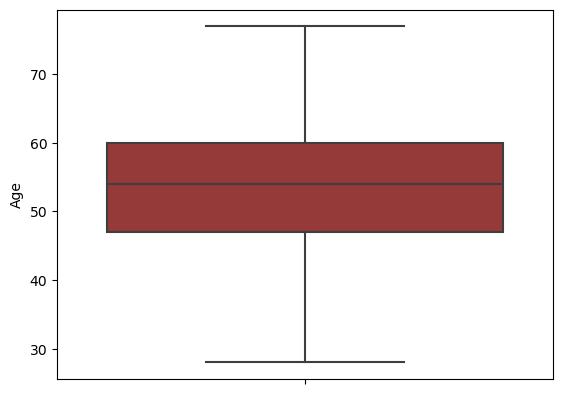

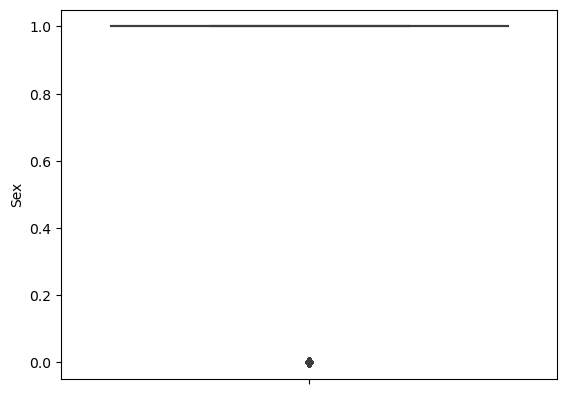

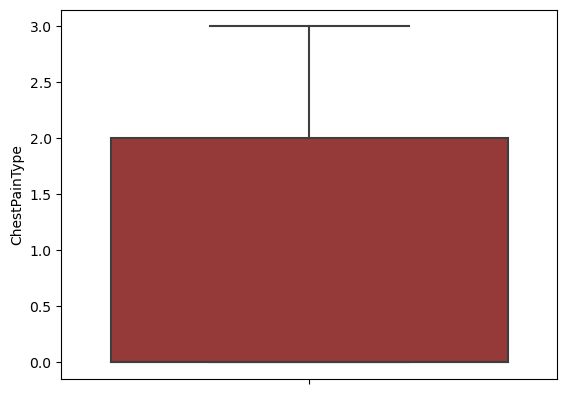

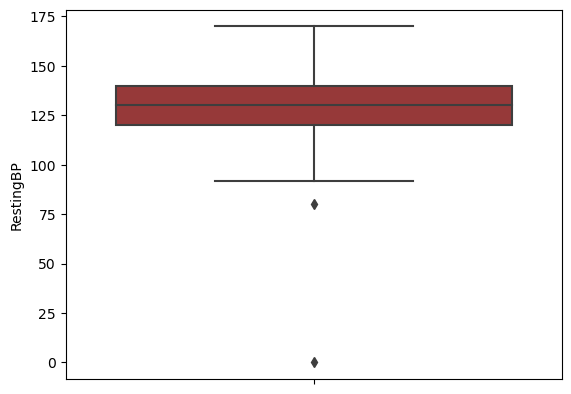

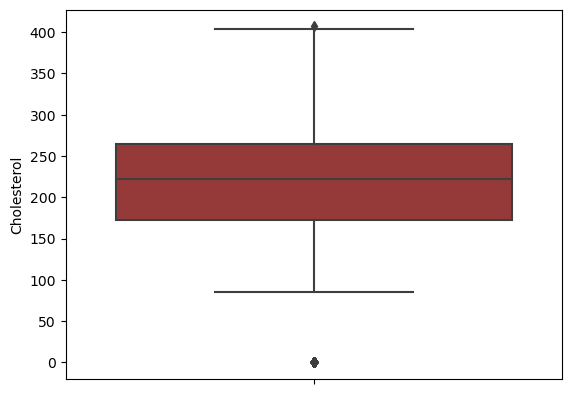

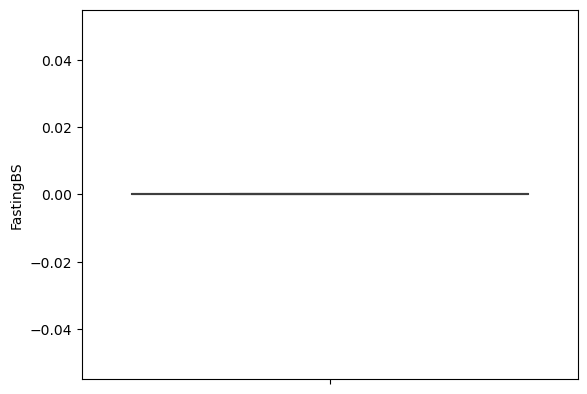

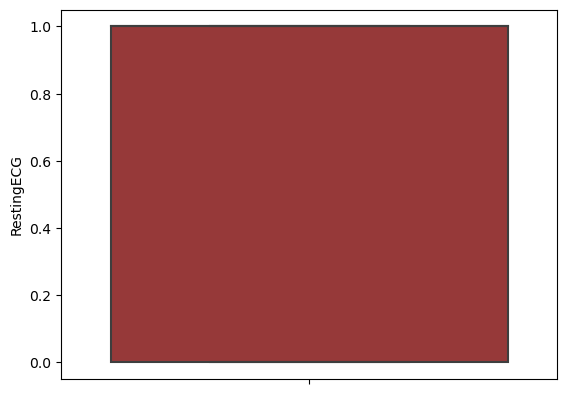

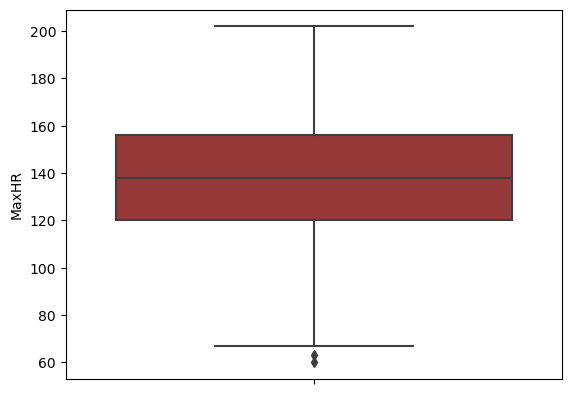

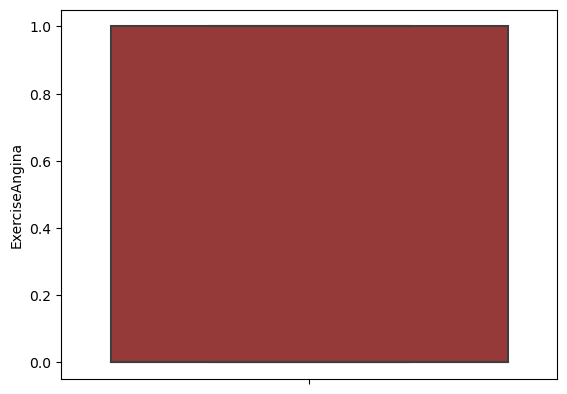

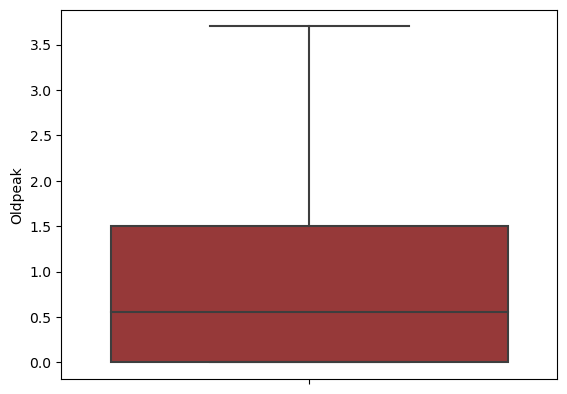

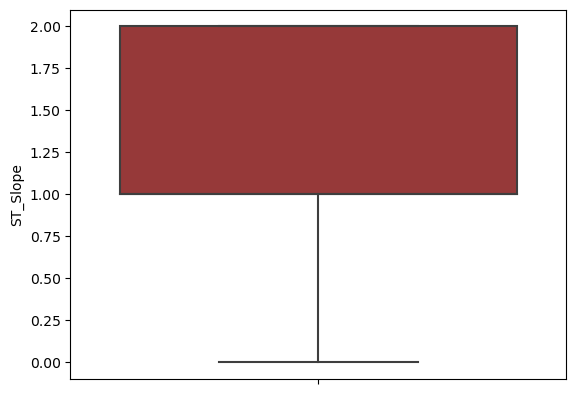

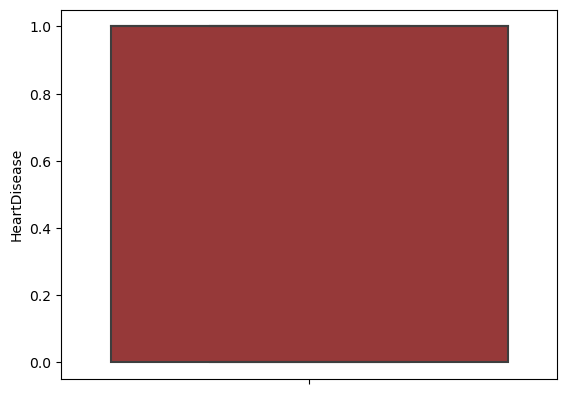

In [34]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot(y=df[i], color='brown')
        plt.show()

In [67]:
df.dropna(inplace=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 558 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             558 non-null    float64
 1   Sex             558 non-null    float64
 2   ChestPainType   558 non-null    float64
 3   RestingBP       558 non-null    float64
 4   Cholesterol     558 non-null    float64
 5   FastingBS       558 non-null    float64
 6   RestingECG      558 non-null    float64
 7   MaxHR           558 non-null    float64
 8   ExerciseAngina  558 non-null    float64
 9   Oldpeak         558 non-null    float64
 10  ST_Slope        558 non-null    float64
 11  HeartDisease    558 non-null    float64
dtypes: float64(12)
memory usage: 56.7 KB


In [69]:
df.corr()[["HeartDisease"]].sort_values(by="HeartDisease", ascending=False)

,HeartDisease
HeartDisease,1.000000
ExerciseAngina,0.520513
Oldpeak,0.456312
Sex,0.314386
Age,0.256999
RestingBP,0.086637
RestingECG,-0.082968
Cholesterol,-0.143585
ChestPainType,-0.401454
MaxHR,-0.426869


<Axes: >

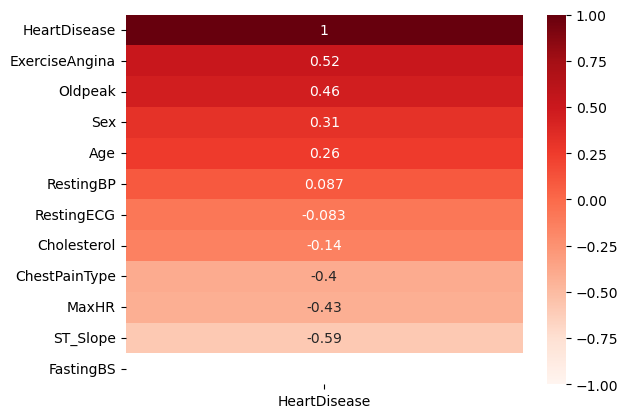

In [70]:
sns.heatmap(df.corr()[['HeartDisease']].sort_values(by='HeartDisease', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Reds')

In [71]:
x=df[['ExerciseAngina','Oldpeak','Sex','Age','RestingBP']].values
y=df[['HeartDisease']].values

In [72]:
sc=StandardScaler()
x= sc.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=0)

In [73]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'RandomForestClassifier':RandomForestClassifier()
}

### Crossvalidation:

In [74]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="accuracy",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    print("Mean Score: ",np.mean(scores))
    print('*'*100)

cross validation model : LogisticRegression
Mean Score:  0.7831168831168831
****************************************************************************************************
cross validation model : DecisionTreeClassifier
Mean Score:  0.6989610389610389
****************************************************************************************************
cross validation model : GradientBoostingClassifier
Mean Score:  0.7563311688311687
****************************************************************************************************
cross validation model : RandomForestClassifier
Mean Score:  0.7437337662337662
****************************************************************************************************


In [75]:
x_train,x_test,y_test,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [94]:
#model prediction
model=LogisticRegression()
model.fit(x_train,y_train)
print('model trained with{}'.format(model))

score_train=accuracy_score(y_train,model.predict(x_train))
score_test=accuracy_score(y_test,model.predict(x_test))

con_train=confusion_matrix(y_train,model.predict(x_train))
con_test=confusion_matrix(y_test,model.predict(x_test))

print('train accuracy:',score_train)
print('test accuracy:',score_test)
print('confusion_matrix train:',con_train)
print('confusion_matrix test:',con_test)

model trained withLogisticRegression()
train accuracy: 0.7802690582959642
test accuracy: 0.7857142857142857
confusion_matrix train: [[196  37]
 [ 61 152]]
confusion_matrix test: [[54 14]
 [10 34]]


#### LogisticRegression  is having a test accuracy close to 80%. So we are selecting this model.

In [97]:
model.fit(x,y)

LogisticRegression()

In [98]:
model.score(x,y)*100

79.56989247311827

In [99]:
print('Accuracy:',model.score(x_test,y_test)*100)

Accuracy: 80.35714285714286


In [95]:
OUTPUT= pd.DataFrame(zip(y,model.predict(x)), columns=("ACTUAL", "PREDICTION"), dtype = int)
OUTPUT

,ACTUAL,PREDICTION
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
553,1,0
554,1,0
555,1,1
556,1,0


In [100]:
expected=y
predicted=model.predict(x)
predicted

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1.

In [101]:
print(metrics.classification_report(expected,predicted))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82       301
         1.0       0.81      0.73      0.77       257

    accuracy                           0.80       558
   macro avg       0.80      0.79      0.79       558
weighted avg       0.80      0.80      0.79       558



Model used is::  LogisticRegression()


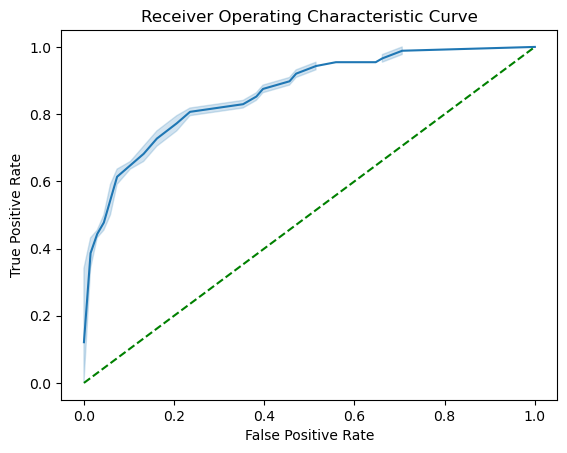

In [102]:
model.fit(x_train, y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("Model used is:: ",model)
sns.lineplot(x= fpr, y=tpr)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.show()

### Conclusion:

#### In this analysis,LogisticRegression , we did extensive analysis of input data and were able to achieve a Text Accuracy of 80%
​